<a href="https://colab.research.google.com/github/opentrainingcamp/python/blob/main/Notebook/Data/DS03_Pandas_requete_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notre exemple NBA (suite)



In [ ]:
import pandas as pd
nba = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/nba-elo/nbaallelo.csv')
type(nba)

pandas.core.frame.DataFrame

# Requêtes sur dataframe pandas

Nous avons vu comment accéder à des sous-ensembles d'un énorme ensemble de données en fonction de ses indices. 
À présent, sélectionnerons des lignes en fonction des valeurs des colonnes. Par exemple, vous pouvez créer un nouveau DataFrame qui contient uniquement les jeux NBA joués après 2010:

In [ ]:
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


In [ ]:
current_decade = nba.loc[nba.year_id > 2010]
# current_decade = nba.loc[nba['year_id'] > 2010]
# current_decade = nba[nba.year_id > 2010]
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.3638,1543.1600,45.141479,BOS,Celtics,88,1625.0994,1629.3031,A,L,0.264418,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.0994,1629.3031,53.754559,MIA,Heat,80,1547.3638,1543.1600,H,W,0.735582,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.1956,1502.5969,40.900764,LAL,Lakers,112,1647.6016,1649.2002,A,L,0.197632,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.6016,1649.2002,55.608730,HOU,Rockets,110,1504.1956,1502.5969,H,W,0.802368,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.0225,1630.6204,53.879230,POR,Trailblazers,106,1552.8141,1565.2162,A,L,0.485912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [ ]:
current_decade.shape

(12658, 23)

In [ ]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [ ]:
nba.notes

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
126309    NaN
126310    NaN
126311    NaN
126312    NaN
126313    NaN
Name: notes, Length: 126314, dtype: object

In [ ]:
# des jeux avec 'notes' (commentaires)
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,71,1469.3469,1454.9012,47.065742,BLB,Baltimore,95,1434.0548,1448.5005,A,L,0.407940,at Baltimore's Fifth Regiment Armory
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,95,1434.0548,1448.5005,46.407490,WSC,Capitols,71,1469.3469,1454.9012,H,W,0.592060,at Baltimore's Fifth Regiment Armory
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,70,1465.9006,1461.1990,47.710297,CHS,Stags,74,1440.7186,1445.4203,A,L,0.393962,Tiebreaker
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,74,1440.7186,1445.4203,46.089687,WSC,Capitols,70,1465.9006,1461.1990,H,W,0.606038,Tiebreaker
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,75,1477.2552,1484.3137,50.044666,CHS,Stags,72,1445.4203,1438.3618,A,W,0.403142,Tiebreaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,1/16/2014,39,0,ATL,Hawks,110,1505.0525,1487.5908,39.239410,BRK,Nets,127,1454.6501,1472.1118,N,L,0.572030,"at London, England"
123916,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,113,1635.7723,1642.4540,54.894760,MIN,Timberwolves,101,1502.9229,1496.2412,N,W,0.682383,"at Mexico City Arena, Mexico City, Mexico"
123917,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,101,1502.9229,1496.2412,40.129723,HOU,Rockets,113,1635.7723,1642.4540,N,L,0.317617,"at Mexico City Arena, Mexico City, Mexico"
124862,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,95,1499.9038,1505.8629,41.138866,NYK,Knicks,79,1304.4620,1298.5029,N,W,0.754925,"at The O2, London, England"


In [ ]:
nba["fran_id"]

0           Huskies
1            Knicks
2             Stags
3            Knicks
4           Falcons
            ...    
126309    Cavaliers
126310     Warriors
126311    Cavaliers
126312    Cavaliers
126313     Warriors
Name: fran_id, Length: 126314, dtype: object

In [ ]:
ers = nba[nba["fran_id"].str.endswith("ers")] # select * from NBA where f(frand_id)
ers

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.0000,1305.1542,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.0000,1304.6908,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.6908,1312.8473,42.347137,DTF,Falcons,49,1279.6189,1271.4624,A,W,0.393811,NaN
20,11,194611070PRO,NBA,0,1947,11/7/1946,2,0,PRO,Steamrollers,73,1305.1542,1311.5032,42.206284,CHS,Stags,65,1316.0840,1309.7350,H,W,0.625446,NaN
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.8473,1302.5988,41.272594,NYK,Knicks,68,1297.0712,1307.3197,H,L,0.660710,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126304,63153,201506070GSW,NBA,1,2015,6/7/2015,98,1,CLE,Cavaliers,95,1708.1705,1716.8708,61.312763,GSW,Warriors,93,1806.2035,1797.5032,A,W,0.242326,NaN
126307,63154,201506090CLE,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,96,1716.8708,1723.4149,61.826408,GSW,Warriors,91,1797.5032,1790.9591,H,W,0.527843,NaN
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN


### Critère multiples

In [ ]:
nba.loc[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
, ["pts", "opp_pts", "team_id"]]

,pts,opp_pts,team_id
1726,114,115,BLB
4890,126,105,BLB
4909,104,112,BLB
5208,107,113,BLB
5825,110,111,BLB


# Regroupement et agrégation de vos données
Vous souhaiterez peut-être également découvrir d'autres fonctionnalités de votre ensemble de données, telles que la somme, la moyenne ou la valeur moyenne d'un groupe d'éléments. Heureusement, la bibliothèque Pandas Python propose des fonctions de regroupement et d'agrégation pour vous aider à accomplir cette tâche.

Une série a plus de vingt méthodes différentes pour calculer les statistiques descriptives. Voici quelques exemples:

In [ ]:
nba.head(1)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.2767,40.29483,NYK,Knicks,68,1300.0,1306.7233,H,L,0.640065,NaN


In [ ]:
nba.pts.sum()

12976235

In [ ]:
nba.pts.mean()

102.72998242475101

In [ ]:
# Le type de nba.pts?
type(nba.pts)

pandas.core.series.Series

Un DataFrame peut avoir plusieurs colonnes, ce qui introduit de nouvelles possibilités d'agrégations, comme le regroupement:

In [ ]:
nba.loc[nba.pts < 33]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
3190,1596,195011220LAL,NBA,0,1951,11/22/1950,10,0,MNL,Lakers,18,1659.4946,1650.9559,56.184555,FTW,Pistons,19,1487.9486,1496.4873,H,L,0.826804,NaN
3191,1596,195011220LAL,NBA,1,1951,11/22/1950,12,0,FTW,Pistons,19,1487.9486,1496.4873,40.739147,MNL,Lakers,18,1659.4946,1650.9559,A,W,0.173196,NaN
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.3387,1457.4464,40.408863,VIR,Squires,2,1484.1907,1487.0830,A,L,0.328948,at Richmond VA; forfeit to VIR
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,2,1484.1907,1487.0830,43.514412,DNR,Nuggets,0,1460.3387,1457.4464,H,W,0.671052,at Richmond VA; forfeit to VIR


In [ ]:
nba.loc[nba.pts < 70].groupby("fran_id", sort=False)

In [ ]:
nba.loc[nba.pts < 70].groupby("fran_id", sort=False).pts

In [ ]:
nba.loc[nba.pts < 50].groupby("fran_id", sort=False).pts.count()

fran_id
Knicks       7
Falcons      7
Celtics     11
Huskies      5
Ironmen      9
Rebels       5
Capitols     2
Bombers      4
Warriors     2
Stags        2
Lakers       1
Pistons      1
Hawks        2
Nuggets      1
Squires      1
Bulls        1
Name: pts, dtype: int64

Par défaut, Pandas trie les touches de groupe lors de l'appel à .groupby (). Si vous ne souhaitez pas trier, transmettez sort = False. Ce paramètre peut conduire à des gains de performances.

Vous pouvez également regrouper par plusieurs colonnes:

In [ ]:
nba[(nba["fran_id"] == "Spurs") & (nba["year_id"] > 2010)].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

A peut prêt ebn sql

select count(game_id) frpom nba where
fran_id = spur and year_id > 2010
group by game_id


Vous pouvez pratiquer ces bases avec cet exercice. 
Jetez un œil à la saison 2014-15 des Golden State Warriors (fran_id: "Warriors") année (year_id: 2015). 
Combien de victoires et de défaites ont-ils marqué pendant la saison régulière et les séries éliminatoires?

In [ ]:
nba[(nba["fran_id"] == "Warriors") & (nba["year_id"] == 2015)].groupby(["is_playoffs", "game_result"])["game_id"].count()

# Manipuler le dataframe

Vous devez savoir comment manipuler les colonnes de votre ensemble de données dans différentes phases du processus d'analyse des données. Vous pouvez ajouter et supprimer des colonnes dans le cadre de la phase initiale de nettoyage des données, ou ultérieurement en fonction des informations de votre analyse.

Créez une copie de votre DataFrame d'origine pour travailler avec:

In [ ]:
df = nba.copy()

In [ ]:
df.head(1)


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.2767,40.29483,NYK,Knicks,68,1300.0,1306.7233,H,L,0.640065,NaN


Vous pouvez définir de nouvelles colonnes basées sur celles existantes

In [ ]:
df["difference"] = df.pts - df.opp_pts

In [ ]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN,-8


Vous pouvez également renommer les colonnes de votre ensemble de données. Il semble que "game_result" et "game_location" soient trop détaillés, alors allez-y et renommez-les maintenant:

In [ ]:
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})

## Visualiser des données

In [ ]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum()

year_id
1947    4234
1948    3815
1949    5253
1950    5924
1951    6814
        ... 
2011    9097
2012    6872
2013    9259
2014    8084
2015    7535
Name: pts, Length: 69, dtype: int64

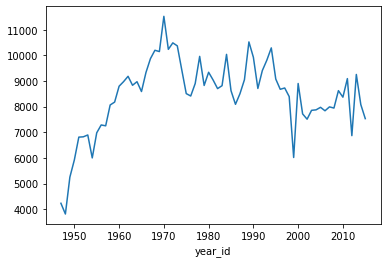

In [ ]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

In [ ]:
nba["fran_id"].value_counts().head(10)

Lakers      6024
Celtics     5997
Knicks      5769
Warriors    5657
Pistons     5650
Sixers      5644
Hawks       5572
Kings       5475
Wizards     4582
Spurs       4309
Name: fran_id, dtype: int64

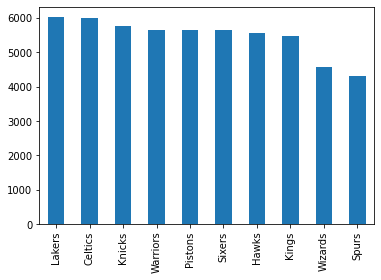

In [ ]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

En 2013, le Miami Heat a remporté le championnat. 
Créez un diagramme à secteurs montrant le décompte de leurs victoires et défaites au cours de cette saison.

In [ ]:
nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts()

W    82
L    23
Name: game_result, dtype: int64

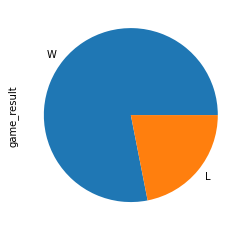

In [ ]:
nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts().plot(kind="pie")